In [9]:
weather_api_key = "da6af3984a25365ad1e517ce7a233975"

In [12]:
# Dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy
from datetime import datetime 
import requests
import time
from scipy.stats import linregress

In [13]:
# Create list for weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [14]:
# Create basic url for API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create 1500 random latitude and longitude coordinates 
latitudes = np.random.uniform(-90, 90, size = 1500)
longitudes = np.random.uniform(-180, 180, size = 1500)
coordinates = zip(latitudes, longitudes)
coordinates

In [16]:
# Add coordinates to a list 
coordinates_lst = list(coordinates)

In [17]:
# Create list for cities 
cities = []

# Use citipy to find nearest cities using coordinate list
for coordinate in coordinates_lst:
    city = citipy.nearest_city(coordinate[0],coordinate[1])
    city_name = city.city_name
    country_name = city.country_code
    
    # Find unique cities to add to cities list
    if city_name not in cities:
        cities.append(city_name)
    
    # See cities and contries
    # print(f'{city_name}, {country_name}')

# Count amount of unique cities
len(cities)

648

In [18]:
# Loop through city Lists 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1 
    
    # Create URL for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log URL, set, and record numbers for each city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

# Make an API request for each city 
    try:
       
        # Parse the JSON data
        city_weather = requests.get(city_url).json()

        # Compile needed data
        city_city = city.title()
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_hum = city_weather['main']['humidity']
        city_cloud = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']

        # Fill City Data list 
        city_data.append({"City": city_city,
                         "Country": city_country,
                         "Date": city_date,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_hum,
                         "Cloudiness": city_cloud,
                         "Wind Speed": city_wind,
                         })
    #If an error occurs
    except: 
        print("City not found. Skipping")
        pass

    # Complete Data Retrieval    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | komsomolskiy
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | lapua
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | butia
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | tuatapere
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | adre
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | sao felix do xingu
Processing Record 19 of Set 1 | bundaberg
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | novopokrovka
Processing Record 22 of Set 1 | san patricio
Processing Record 23 of Set 1 | maumere
Processing Record 24 of Set 1 |

Processing Record 40 of Set 4 | severo-kurilsk
Processing Record 41 of Set 4 | klaksvik
Processing Record 42 of Set 4 | touros
Processing Record 43 of Set 4 | ponta do sol
Processing Record 44 of Set 4 | kodiak
Processing Record 45 of Set 4 | esperance
Processing Record 46 of Set 4 | porto walter
Processing Record 47 of Set 4 | atambua
Processing Record 48 of Set 4 | bredasdorp
Processing Record 49 of Set 4 | yumen
Processing Record 50 of Set 4 | ulaanbaatar
Processing Record 1 of Set 5 | canon city
Processing Record 2 of Set 5 | eskasem
City not found. Skipping
Processing Record 3 of Set 5 | portland
Processing Record 4 of Set 5 | los alamos
Processing Record 5 of Set 5 | bama
Processing Record 6 of Set 5 | saiki
Processing Record 7 of Set 5 | bargal
City not found. Skipping
Processing Record 8 of Set 5 | san quintin
Processing Record 9 of Set 5 | mangalia
Processing Record 10 of Set 5 | fairbanks
Processing Record 11 of Set 5 | ballina
Processing Record 12 of Set 5 | ouahigouya
Proce

Processing Record 35 of Set 8 | mufulira
Processing Record 36 of Set 8 | moose factory
Processing Record 37 of Set 8 | coihaique
Processing Record 38 of Set 8 | gat
Processing Record 39 of Set 8 | buchanan
Processing Record 40 of Set 8 | kaeo
Processing Record 41 of Set 8 | mbini
Processing Record 42 of Set 8 | salalah
Processing Record 43 of Set 8 | yarada
Processing Record 44 of Set 8 | rudbar
Processing Record 45 of Set 8 | peleduy
Processing Record 46 of Set 8 | pevek
Processing Record 47 of Set 8 | mollendo
Processing Record 48 of Set 8 | xinzhi
Processing Record 49 of Set 8 | chokurdakh
Processing Record 50 of Set 8 | launceston
Processing Record 1 of Set 9 | nagua
Processing Record 2 of Set 9 | kawalu
Processing Record 3 of Set 9 | carbonia
Processing Record 4 of Set 9 | coahuayana
Processing Record 5 of Set 9 | evensk
Processing Record 6 of Set 9 | natal
Processing Record 7 of Set 9 | isangel
Processing Record 8 of Set 9 | kirakira
Processing Record 9 of Set 9 | bulgan
Processi

Processing Record 24 of Set 12 | chicama
Processing Record 25 of Set 12 | slupsk
Processing Record 26 of Set 12 | palaiokhora
City not found. Skipping
Processing Record 27 of Set 12 | porosozero
Processing Record 28 of Set 12 | usinsk
Processing Record 29 of Set 12 | mongo
Processing Record 30 of Set 12 | kulhudhuffushi
Processing Record 31 of Set 12 | los algarrobos
Processing Record 32 of Set 12 | visnes
Processing Record 33 of Set 12 | mount isa
Processing Record 34 of Set 12 | canitas
City not found. Skipping
Processing Record 35 of Set 12 | bereda
Processing Record 36 of Set 12 | gavle
Processing Record 37 of Set 12 | tayu
Processing Record 38 of Set 12 | zaozhuang
Processing Record 39 of Set 12 | brae
Processing Record 40 of Set 12 | los llanos de aridane
Processing Record 41 of Set 12 | paamiut
Processing Record 42 of Set 12 | quatre cocos
Processing Record 43 of Set 12 | taoudenni
Processing Record 44 of Set 12 | azrow
City not found. Skipping
Processing Record 45 of Set 12 | g

In [19]:
len(city_data)

604

In [20]:
# Add the data to a list in a dict then at the DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Komsomolskiy,UZ,2022-04-10 03:32:20,40.4272,71.7189,70.52,49,95,0.00
1,Ancud,CL,2022-04-10 03:34:43,-41.8697,-73.8203,45.23,83,11,1.88
2,Mataura,NZ,2022-04-10 03:34:43,-46.1927,168.8643,61.38,56,11,5.10
3,New Norfolk,AU,2022-04-10 03:34:43,-42.7826,147.0587,78.30,38,99,5.01
4,Punta Arenas,CL,2022-04-10 03:34:44,-53.1500,-70.9167,46.51,71,75,13.80


In [21]:
# Create CSV file of DF
csv_weather_file = "weather_data/cities.csv"
# Export CSV file 
city_data_df.to_csv(csv_weather_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1649562234.814292

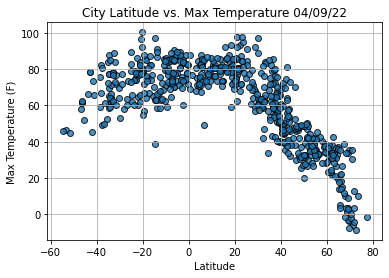

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

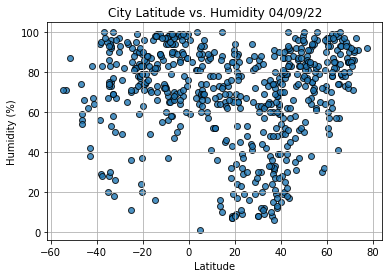

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

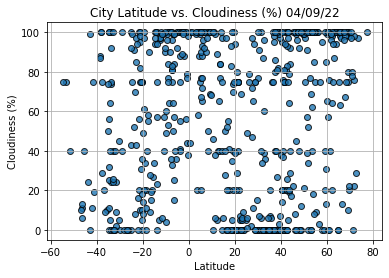

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

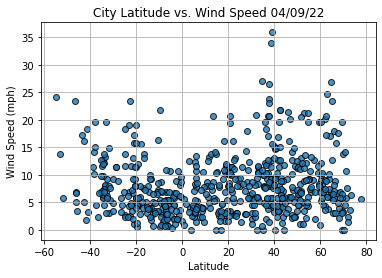

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Komsomolskiy,UZ,2022-04-10 03:32:20,40.4272,71.7189,70.52,49,95,0.00
5,Lapua,FI,2022-04-10 03:34:44,62.9693,23.0088,30.88,96,100,6.58
6,Albany,US,2022-04-10 03:34:44,42.6001,-73.9662,40.46,79,26,7.00
11,Hilo,US,2022-04-10 03:34:05,19.7297,-155.0900,72.25,91,100,8.05
12,Adre,TD,2022-04-10 03:34:46,13.4667,22.2000,77.23,13,77,8.70
...,...,...,...,...,...,...,...,...,...
597,Roma,US,2022-04-10 03:37:36,43.2128,-75.4557,40.95,83,75,5.75
599,Polonnaruwa,LK,2022-04-10 03:37:37,7.9333,81.0000,86.92,60,97,7.20
600,Dubrovka,RU,2022-04-10 03:37:37,53.6907,33.5071,37.53,94,100,9.10
602,Purna,IN,2022-04-10 03:37:37,19.1833,77.0500,85.89,19,70,12.06


In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Komsomolskiy,UZ,2022-04-10 03:32:20,40.4272,71.7189,70.52,49,95,0.00
5,Lapua,FI,2022-04-10 03:34:44,62.9693,23.0088,30.88,96,100,6.58
6,Albany,US,2022-04-10 03:34:44,42.6001,-73.9662,40.46,79,26,7.00
11,Hilo,US,2022-04-10 03:34:05,19.7297,-155.0900,72.25,91,100,8.05
12,Adre,TD,2022-04-10 03:34:46,13.4667,22.2000,77.23,13,77,8.70


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

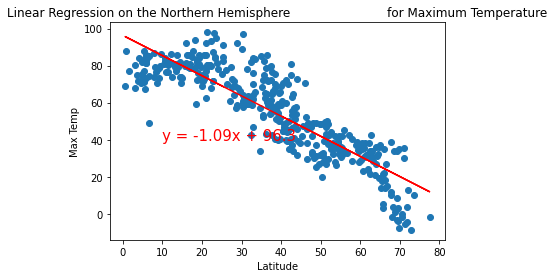

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [39]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n'
    
    for 'Maximum Temperature', 'Max Temp',(-50,90))

SyntaxError: cannot assign to literal (4009791230.py, line 10)